In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [ ]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-n

In [ ]:
print("\nMissing values:")
print(df.isna().sum())


Missing values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [ ]:
# Check unique values and datatype of POSTALCODE
print(df['POSTALCODE'].dtype)
print(df['POSTALCODE'].unique()[:10])  # Just to inspect the first few

object
['3004' '2067' '2060']


In [ ]:
# Try converting POSTALCODE to numeric, set errors='coerce' to turn invalids into NaN
df['POSTALCODE'] = pd.to_numeric(df['POSTALCODE'], errors='coerce')

In [ ]:
# Now fill missing values with median
postal_median = np.nanmedian(df['POSTALCODE'])
df['POSTALCODE'] = df['POSTALCODE'].fillna(postal_median)

In [ ]:
# Drop unnecessary columns
columns_to_drop = [
    'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE',
    'CONTACTLASTNAME', 'CONTACTFIRSTNAME'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [ ]:
# Convert STATUS to numeric (helps in groupby or plotting if needed)
df['STATUS'] = df['STATUS'].astype('category').cat.codes

In [ ]:
# Reset index just in case
df.reset_index(drop=True, inplace=True)

In [ ]:
print("\n--- Basic Statistics ---")
print("Mean sales:", np.mean(df['SALES']))
print("Median sales:", np.median(df['SALES']))
print("Standard deviation of price each:", np.std(df['PRICEEACH']))



--- Basic Statistics ---
Mean sales: 3446.003537414966
Median sales: 3160.74
Standard deviation of price each: 19.829461611672247


In [ ]:
# Groupby: Average sales by year
yearly_sales = df.groupby('YEAR_ID')['SALES'].mean()
print("\nAverage Sales per Year:")
print(yearly_sales)


Average Sales per Year:
YEAR_ID
2003    3413.784808
2004    3493.045397
2005    3405.745312
Name: SALES, dtype: float64


In [ ]:
# Filtering: High value orders (SALES > 10000)
high_value_orders = df[df['SALES'] > 10000]
print("\nNumber of High Value Orders (> $10,000):", len(high_value_orders))


Number of High Value Orders (> $10,000): 0


In [ ]:
pivot = pd.pivot_table(df,
                       index='YEAR_ID',
                       columns='STATUS',
                       values='SALES',
                       aggfunc='mean')
print("\nAverage Sales by Year and Status:")
print(pivot)


Average Sales by Year and Status:
STATUS             0            1
YEAR_ID                          
2003             NaN  3413.784808
2004             NaN  3493.045397
2005     3382.417692  3421.706316


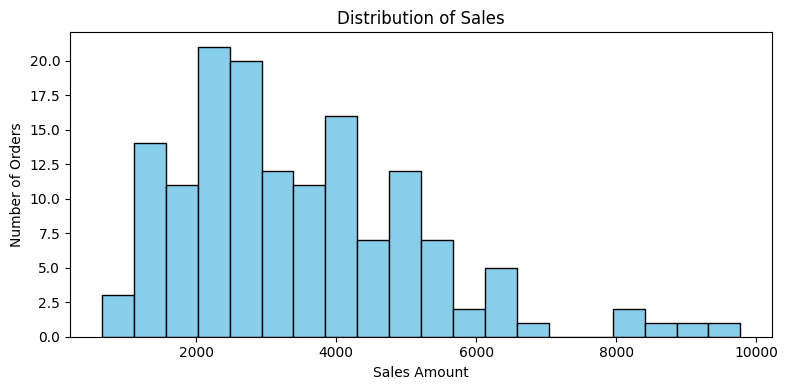

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df['SALES'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


<ipython-input-19-d9194ef5792c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DEALSIZE', y='SALES', data=df, estimator=np.mean, ci=None)


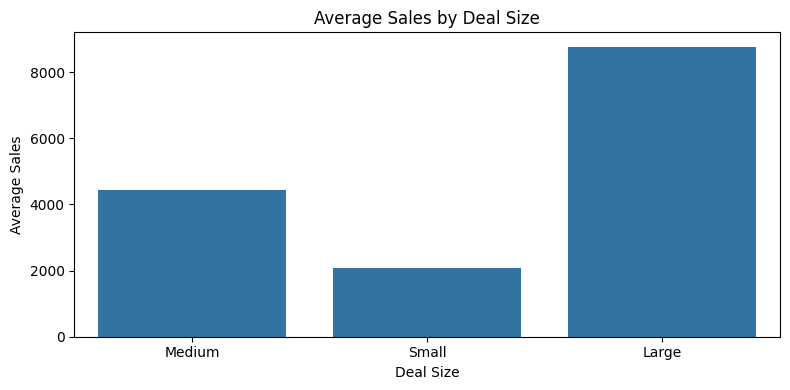

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='DEALSIZE', y='SALES', data=df, estimator=np.mean, ci=None)
plt.title('Average Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()


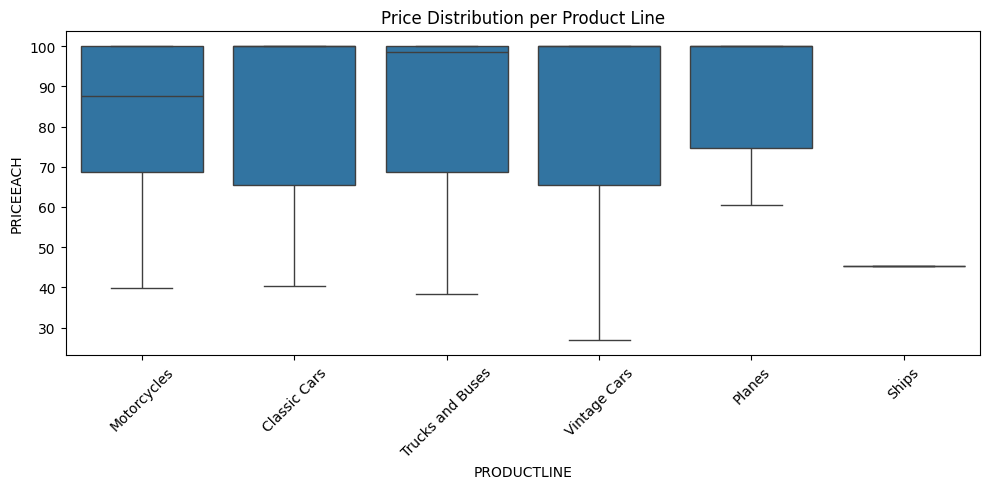

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=df)
plt.title('Price Distribution per Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
sales_array = df['SALES'].values


In [ ]:
print("Mean Sales:", np.mean(sales_array))
print("Median Sales:", np.median(sales_array))
print("Standard Deviation of Sales:", np.std(sales_array))
print("Maximum Sale:", np.max(sales_array))
print("Minimum Sale:", np.min(sales_array))

Mean Sales: 3446.003537414966
Median Sales: 3160.74
Standard Deviation of Sales: 1712.1353632479197
Maximum Sale: 9774.03
Minimum Sale: 652.35


In [ ]:
above_avg_sales = sales_array[sales_array > np.mean(sales_array)]
print("Number of sales above average:", len(above_avg_sales))

Number of sales above average: 64


In [ ]:
avg_sales_by_product = df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False)
print("Average Sales by Product Line:")
print(avg_sales_by_product)

Average Sales by Product Line:
PRODUCTLINE
Trucks and Buses    3667.831111
Vintage Cars        3546.999487
Classic Cars        3518.923043
Motorcycles         3430.757727
Planes              3036.766190
Ships               1089.360000
Name: SALES, dtype: float64


In [ ]:
total_quantity_by_year = df.groupby('YEAR_ID')['QUANTITYORDERED'].sum()
print("\nTotal Quantity Ordered by Year:")
print(total_quantity_by_year)



Total Quantity Ordered by Year:
YEAR_ID
2003    1731
2004    2138
2005    1127
Name: QUANTITYORDERED, dtype: int64


In [ ]:
pivot_sales = pd.pivot_table(df,
                              index='COUNTRY',
                              columns='YEAR_ID',
                              values='SALES',
                              aggfunc='sum')
print("\nPivot Table: Sales by Country and Year:")
print(pivot_sales.head())



Pivot Table: Sales by Country and Year:
YEAR_ID         2003       2004       2005
COUNTRY                                   
Australia  177516.81  220061.86  108983.85


In [ ]:
pivot_price = pd.pivot_table(df,
                              index='PRODUCTLINE',
                              columns='DEALSIZE',
                              values='PRICEEACH',
                              aggfunc='mean')
print("\nPivot Table: Avg Price Each by Product Line and Deal Size:")
print(pivot_price)



Pivot Table: Avg Price Each by Product Line and Deal Size:
DEALSIZE          Large     Medium      Small
PRODUCTLINE                                  
Classic Cars        NaN  96.583077  69.102000
Motorcycles       100.0  96.433333  72.959286
Planes              NaN  93.693636  81.732000
Ships               NaN        NaN  45.390000
Trucks and Buses  100.0  99.648889  67.482500
Vintage Cars      100.0  98.172632  65.546111


<ipython-input-28-ee6d530638b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_product.index, y=avg_sales_by_product.values, palette="viridis")


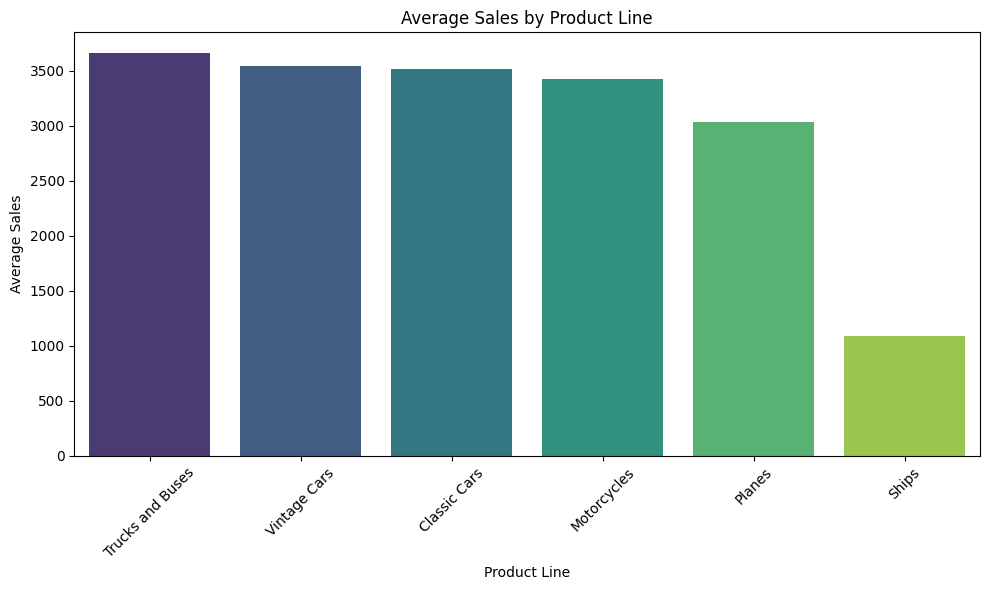

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_product.index, y=avg_sales_by_product.values, palette="viridis")
plt.title("Average Sales by Product Line")
plt.ylabel("Average Sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

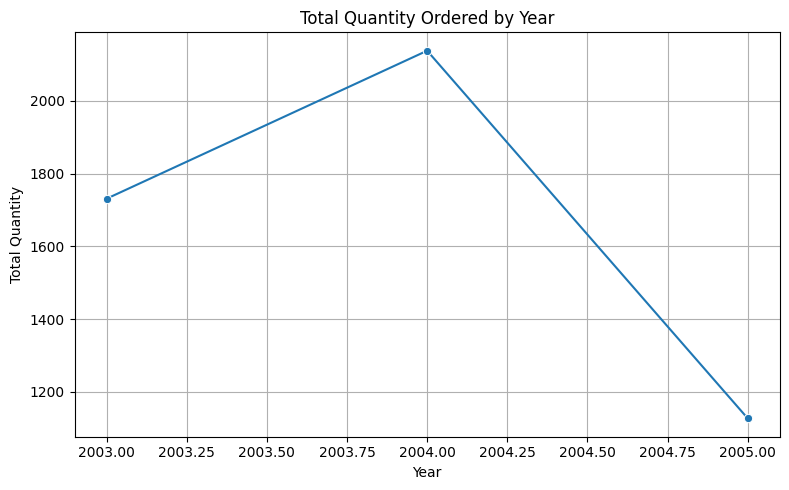

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=total_quantity_by_year.index, y=total_quantity_by_year.values, marker='o')
plt.title("Total Quantity Ordered by Year")
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()


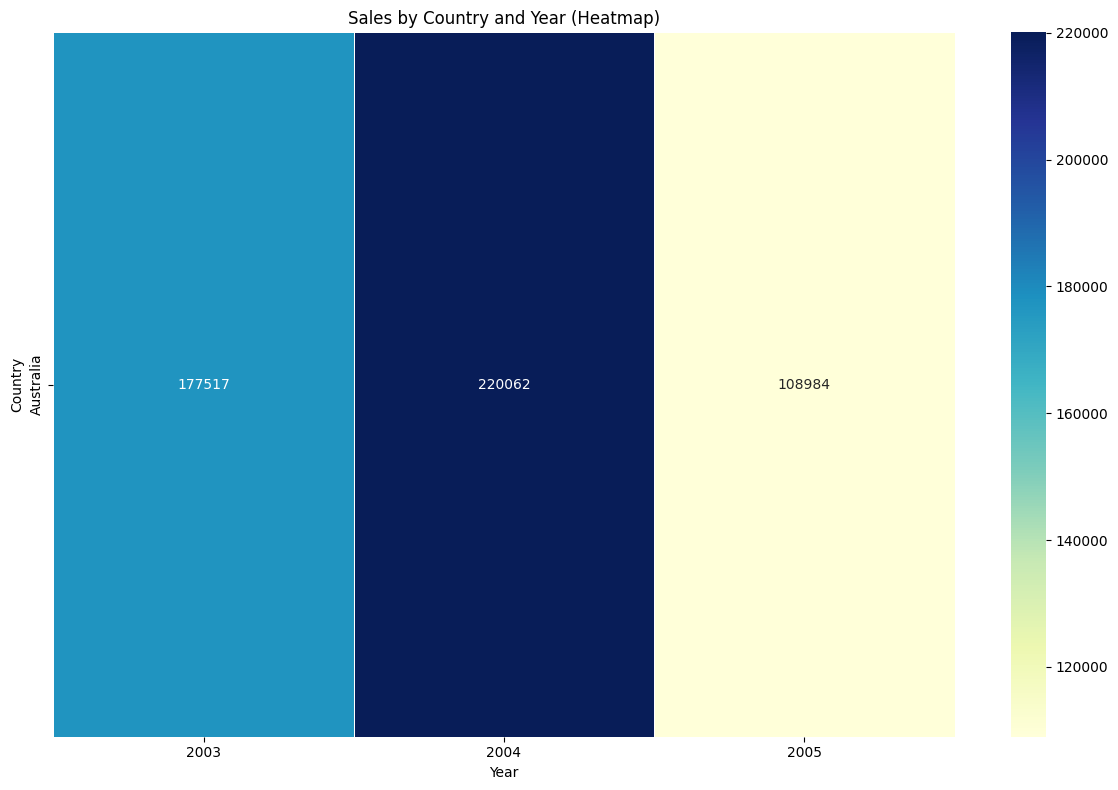

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title("Sales by Country and Year (Heatmap)")
plt.ylabel("Country")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
df['PROFIT'] = df['SALES'] - (df['QUANTITYORDERED'] * 70)


In [ ]:
top_customers = df.groupby('CUSTOMERNAME')['PROFIT'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Profit:")
print(top_customers)


Top 5 Customers by Profit:
CUSTOMERNAME
Australian Collectors, Co.    66175.41
Anna's Decorations, Ltd       51166.13
Souveniers And Things Co.     39500.98
Name: PROFIT, dtype: float64


In [ ]:
df.to_csv("cleaned_sales_data.csv", index=False)


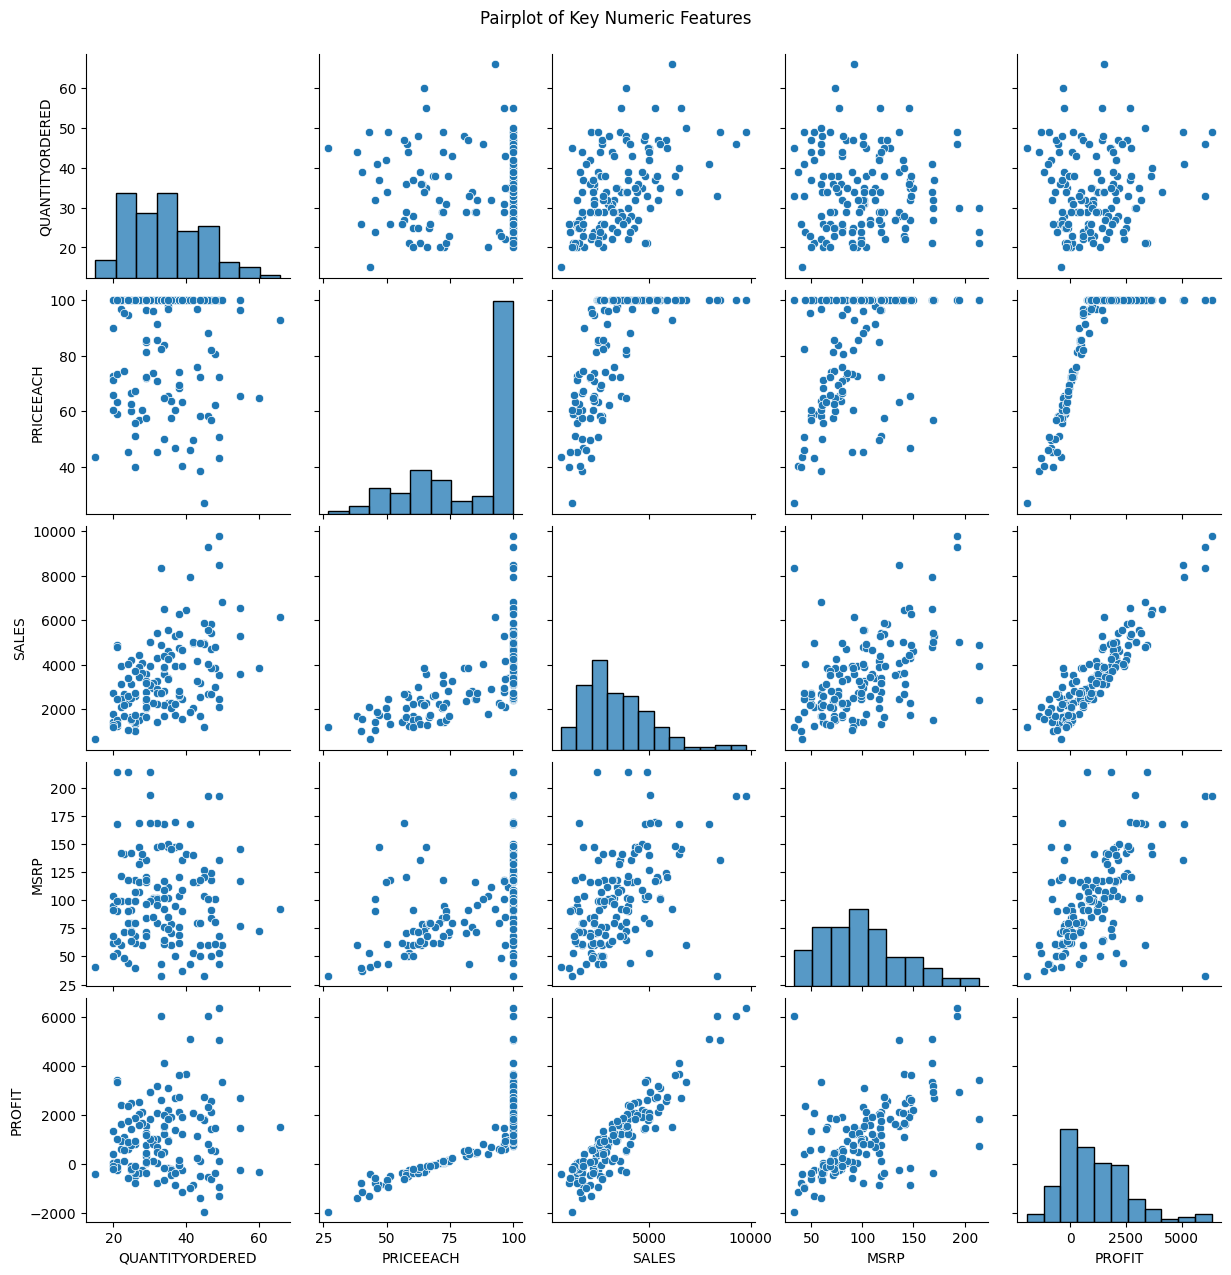

In [ ]:
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'PROFIT']
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()


In [35]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")



Number of duplicate rows: 0


In [36]:
# Top 5 best-selling products
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 products by total sales:")
print(top_products)



Top 5 products by total sales:
PRODUCTCODE
S18_2795    19255.22
S10_4698    19038.89
S12_1666    18616.09
S18_2949    14791.60
S18_4600    12936.10
Name: SALES, dtype: float64


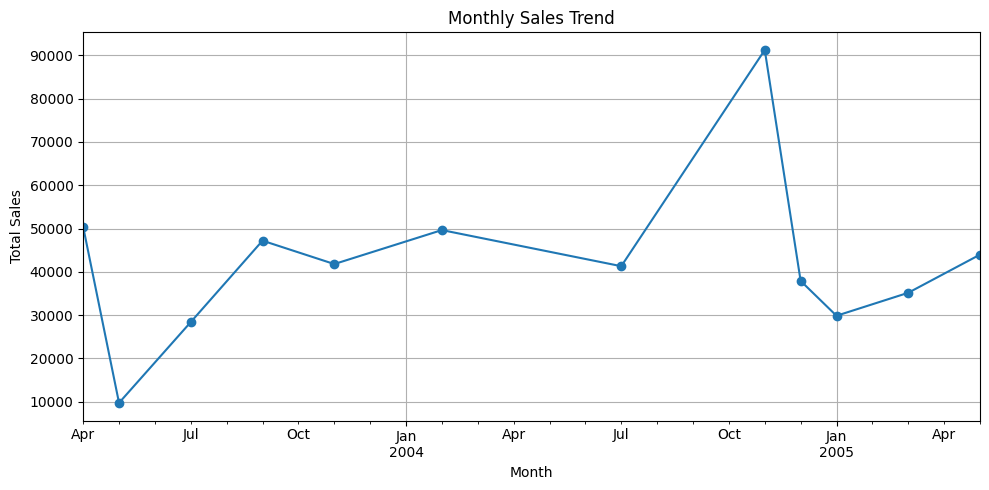

In [37]:
# Convert ORDERDATE to datetime if not already
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Monthly sales trend
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

# Plot
monthly_sales.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-38-197fa638cfe2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


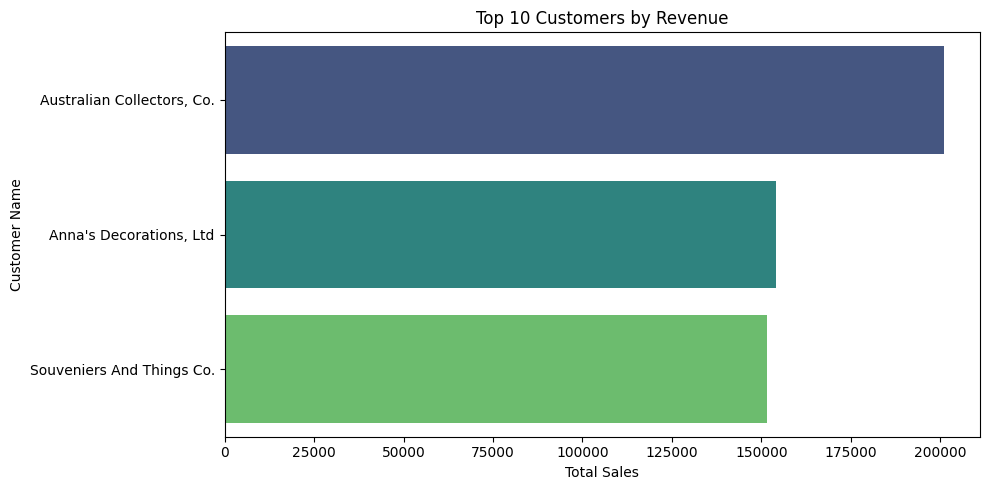

In [38]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()


<ipython-input-39-56d58e783170>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_per_year.index, y=orders_per_year.values, palette='Set2')


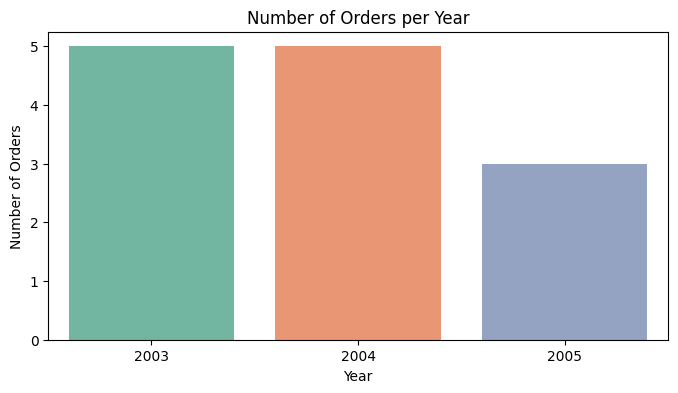

In [39]:
orders_per_year = df.groupby('YEAR_ID')['ORDERNUMBER'].nunique()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=orders_per_year.index, y=orders_per_year.values, palette='Set2')
plt.title('Number of Orders per Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()


<ipython-input-40-db29057ceae7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


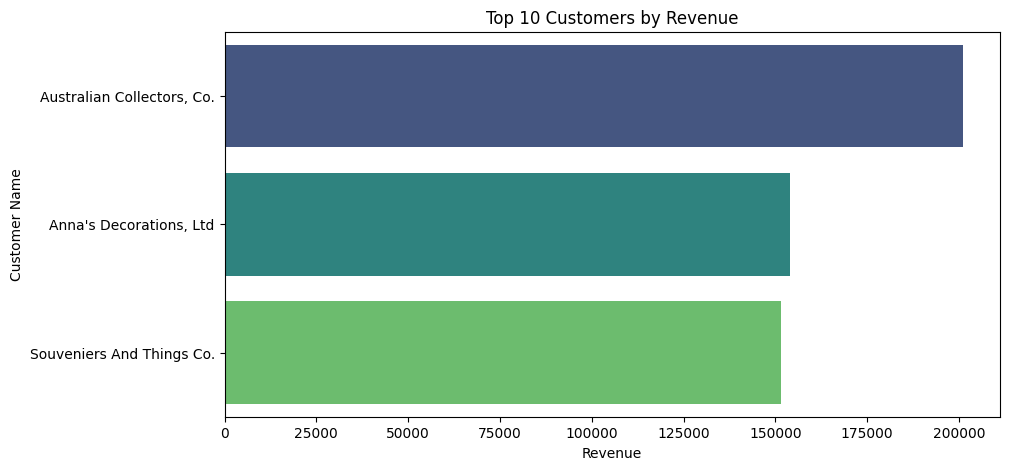

In [40]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer Name')
plt.show()


YEAR_ID               2003      2004      2005
PRODUCTLINE                                   
Classic Cars      66508.38  63952.56  31409.52
Motorcycles       42352.70  33123.97       NaN
Planes            22347.02  41425.07       NaN
Ships                  NaN   1089.36       NaN
Trucks and Buses       NaN  36104.09  29916.87
Vintage Cars      46308.71  44366.81  47657.46


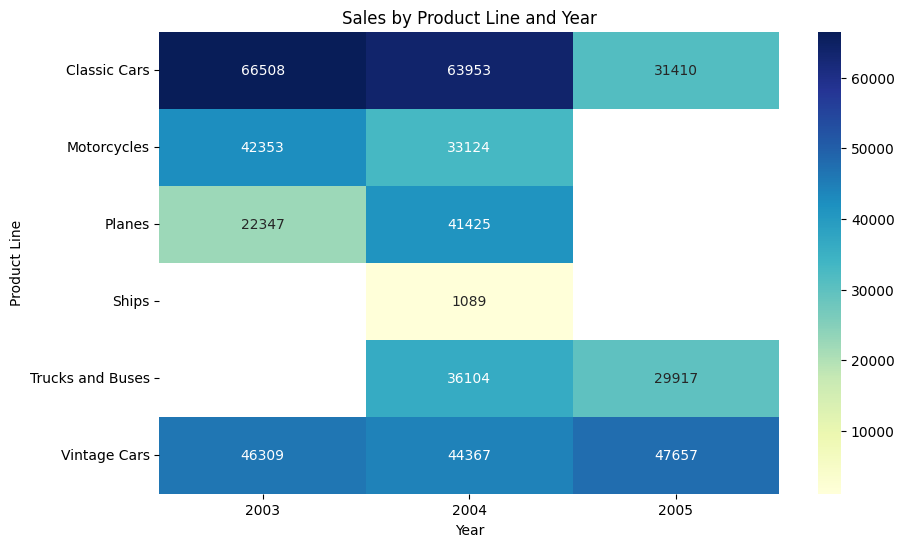

In [41]:
product_year_sales = df.groupby(['PRODUCTLINE', 'YEAR_ID'])['SALES'].sum().unstack()

# Display table
print(product_year_sales)

# Plot as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(product_year_sales, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales by Product Line and Year')
plt.xlabel('Year')
plt.ylabel('Product Line')
plt.show()


Number of outlier sales records: 5


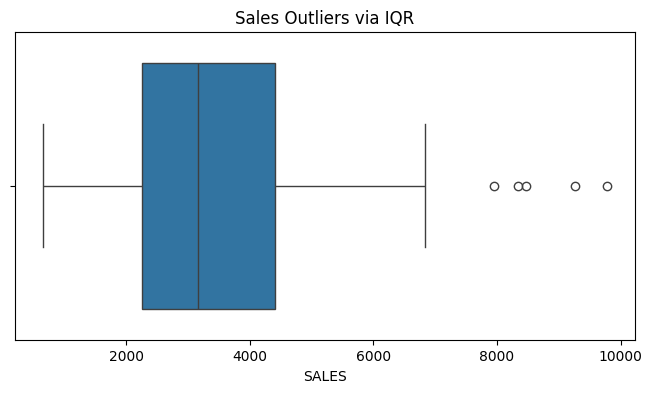

In [42]:
Q1 = df['SALES'].quantile(0.25)
Q3 = df['SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['SALES'] < Q1 - 1.5 * IQR) | (df['SALES'] > Q3 + 1.5 * IQR)]
print(f"Number of outlier sales records: {len(outliers)}")

# Optional: visualize
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['SALES'])
plt.title('Sales Outliers via IQR')
plt.show()


In [44]:
print(df.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'DEALSIZE', 'PROFIT'],
      dtype='object')


In [45]:
# Categorize SALES into revenue buckets
df['sales_bucket'] = pd.cut(df['SALES'],
                            bins=[0, 500, 1000, df['SALES'].max()],
                            labels=['Low', 'Medium', 'High'])

print(df[['SALES', 'sales_bucket']].head())


     SALES sales_bucket
0  3965.66         High
1  1451.00         High
2  4905.39         High
3  3944.70         High
4  2416.56         High


In [46]:
# Tag orders as 'Large Deal' or 'Regular Deal' based on SALES
df['deal_type'] = np.where(df['SALES'] > 1000, 'Large Deal', 'Regular Deal')
print(df[['SALES', 'deal_type']].head())


     SALES   deal_type
0  3965.66  Large Deal
1  1451.00  Large Deal
2  4905.39  Large Deal
3  3944.70  Large Deal
4  2416.56  Large Deal


In [47]:
# Total sales per customer
customer_sales = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()

# Rank customers
customer_sales['rank'] = customer_sales['SALES'].rank(ascending=False)
print(customer_sales.sort_values('rank').head())


                 CUSTOMERNAME      SALES  rank
1  Australian Collectors, Co.  200995.41   1.0
0     Anna's Decorations, Ltd  153996.13   2.0
2   Souveniers And Things Co.  151570.98   3.0


In [48]:
# Total sales per customer
customer_sales = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()

# Rank customers
customer_sales['rank'] = customer_sales['SALES'].rank(ascending=False)
print(customer_sales.sort_values('rank').head())


                 CUSTOMERNAME      SALES  rank
1  Australian Collectors, Co.  200995.41   1.0
0     Anna's Decorations, Ltd  153996.13   2.0
2   Souveniers And Things Co.  151570.98   3.0


In [49]:
# Bin SALES into 4 quantile-based buckets
df['sales_bin'] = pd.qcut(df['SALES'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print(df[['SALES', 'sales_bin']].head())


     SALES  sales_bin
0  3965.66       High
1  1451.00        Low
2  4905.39  Very High
3  3944.70       High
4  2416.56     Medium


In [50]:
# Total profit by month
monthly_profit = df.groupby('MONTH_ID')['PROFIT'].sum()
print(monthly_profit)


MONTH_ID
1     11932.17
2     14847.57
3     11430.25
4     13647.66
5     11849.61
7     24894.40
9     17091.76
11    43273.95
12     7875.15
Name: PROFIT, dtype: float64


In [51]:
# Profit margin = (PROFIT / SALES) * 100
df['profit_margin'] = (df['PROFIT'] / df['SALES']) * 100

# Top 5 orders with highest profit margin
print(df.sort_values('profit_margin', ascending=False)[['ORDERNUMBER', 'SALES', 'PROFIT', 'profit_margin']].head())


    ORDERNUMBER    SALES   PROFIT  profit_margin
92        10391  8344.71  6034.71      72.317792
2         10270  4905.39  3435.39      70.032964
50        10347  4815.30  3345.30      69.472307
8         10120  9264.86  6044.86      65.245023
9         10223  9774.03  6344.03      64.907004


In [52]:
# Count of orders by country and deal size
country_deal_counts = df.groupby(['COUNTRY', 'DEALSIZE']).size().unstack(fill_value=0)
print(country_deal_counts)


DEALSIZE   Large  Medium  Small
COUNTRY                        
Australia      5      71     71


In [53]:
# Mean quantity per product line
avg_quantity = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].mean()
print(avg_quantity)


PRODUCTLINE
Classic Cars        34.391304
Motorcycles         34.318182
Planes              31.523810
Ships               24.000000
Trucks and Buses    34.111111
Vintage Cars        34.846154
Name: QUANTITYORDERED, dtype: float64


In [54]:
# Spread of profits over the years
profit_std_by_year = df.groupby('YEAR_ID')['PROFIT'].std()
print(profit_std_by_year)


YEAR_ID
2003    1455.641944
2004    1428.458120
2005    1737.998281
Name: PROFIT, dtype: float64


In [55]:
# Shows how order statuses are distributed across different deal sizes
status_deals = pd.crosstab(df['STATUS'], df['DEALSIZE'])
print(status_deals)


DEALSIZE  Large  Medium  Small
STATUS                        
0             0       7      6
1             5      64     65


In [56]:
# Products with the highest total sales
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)
print(top_products)


PRODUCTCODE
S18_2795    19255.22
S10_4698    19038.89
S12_1666    18616.09
S18_2949    14791.60
S18_4600    12936.10
S10_4962    12762.43
S18_1097    12626.71
S18_1342    11988.56
S18_3232    11983.33
S18_3136    11524.48
Name: SALES, dtype: float64


In [57]:
# Avg profit per product line per month
monthly_avg_profit = df.groupby(['PRODUCTLINE', 'MONTH_ID'])['PROFIT'].mean().unstack()
print(monthly_avg_profit)


MONTH_ID                1        2            3            4            5   \
PRODUCTLINE                                                                  
Classic Cars      -254.000      NaN   -59.070000          NaN   466.522857   
Motorcycles            NaN  1606.91          NaN  1439.265000          NaN   
Planes                 NaN   775.29          NaN   842.431429          NaN   
Ships                  NaN      NaN          NaN          NaN          NaN   
Trucks and Buses  1851.695      NaN  -404.433333          NaN          NaN   
Vintage Cars      1330.000  -526.27  2552.338000  -442.475000  1072.993750   

MONTH_ID                   7            9            11          12  
PRODUCTLINE                                                          
Classic Cars      2108.490000  1221.041538  1383.785789         NaN  
Motorcycles               NaN          NaN   454.544286 -219.550000  
Planes                    NaN          NaN          NaN  860.416250  
Ships                    

In [58]:
# Calculating a 3-month rolling average of total sales
monthly_sales = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()
monthly_sales['RollingMean'] = monthly_sales['SALES'].rolling(window=3).mean()
print(monthly_sales)


    YEAR_ID  MONTH_ID     SALES   RollingMean
0      2003         4  50397.66           NaN
1      2003         5   9738.18           NaN
2      2003         7  28397.26  29511.033333
3      2003         9  47191.76  28442.400000
4      2003        11  41791.95  39126.990000
5      2004         2  49637.57  46207.093333
6      2004         7  41297.14  44242.220000
7      2004        11  91222.00  60718.903333
8      2004        12  37905.15  56808.096667
9      2005         1  29852.17  52993.106667
10     2005         3  35160.25  34305.856667
11     2005         5  43971.43  36327.950000
